In [32]:
#T.Bradford
#July 2021

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import inspect

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [40]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [41]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [42]:
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')


## Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [44]:
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
 
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [45]:
# Perform a query to retrieve the data and precipitation scores
# Sort the data by date

prcp_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
        order_by(Measurement.date).all()

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data = pd.DataFrame(prcp_scores, columns= ["Date","Precipitation"])
prcp_data

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [47]:
prcp_data = prcp_data.set_index("Date")
prcp_data

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


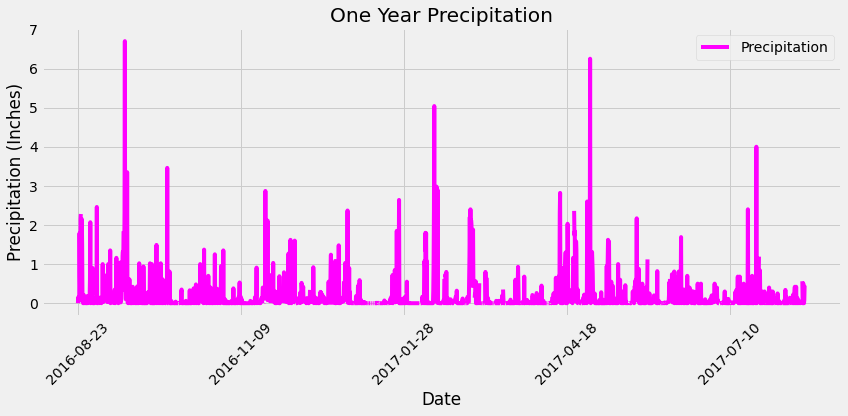

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data


fig, ax = plt.subplots(figsize=(12,6))
prcp_data_plot = prcp_data.plot(ax =ax,x_compat = True, color = "fuchsia")
plt.title("One Year Precipitation")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Precipitation (Inches)")
plt.tight_layout()
plt.show()


In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).distinct().all()
total_stations = len(total_stations)
print(f"Total number of Stations is {total_stations}")

Total number of Stations is 9


In [51]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = (session.query(Measurement.station, func.count(Measurement.station))
        .group_by(Measurement.station)
        .order_by(func.count(Measurement.station).desc())
        .all())

print(station_activity)

print("\nStation USC00519281 has the most activity with 2772")


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]

Station USC00519281 has the most activity with 2772


In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

print(f"The lowest temperature recorded at station USC00519281 is {lowest_temp}\n")

print(f"The highest temperature recorded at station USC00519281 is{highest_temp}\n")

print(f"The average temperature recorded at station USC00519281 is {average_temp}\n")

The lowest temperature recorded at station USC00519281 is [(54.0,)]

The highest temperature recorded at station USC00519281 is[(85.0,)]

The average temperature recorded at station USC00519281 is [(71.66378066378067,)]



In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_past_yr = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= year_ago)


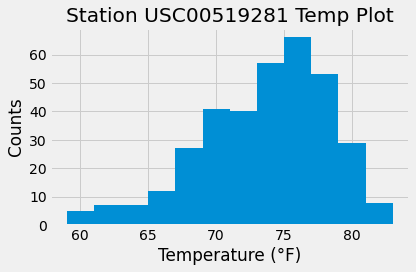

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_yr = pd.DataFrame(active_station_past_yr, columns= ["Date","Temperature"])

plt.hist(station_yr["Temperature"], bins= 12,)
plt.title("Station USC00519281 Temp Plot" )
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.tight_layout()
#plt.savefig("Histogram.png")
plt.show()


# Close session

In [55]:
# Close Session
session.close()